In [36]:
import pandas as pd
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, RandomizedSearchCV, StratifiedKFold, GridSearchCV
import seaborn as sns
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline

wine_data = load_wine()


X = wine_data.data  
y = wine_data.target  

wine_df = pd.DataFrame(X, columns=wine_data.feature_names)

print(wine_df.head())
wine_df.shape

   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  
0                  

(178, 13)

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [38]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Step for standard scaling
    ('randomforest', RandomForestClassifier(random_state=42))  # Random Forest Classifier
])

In [42]:
cv = StratifiedKFold(n_splits= 5, shuffle = True , random_state = 42)
param_grid = {
    'randomforest__n_estimators': [25,50, 100, 200, 300],      
    'randomforest__max_depth' : [ 3,5,10,25], # Con none do profondità finchè è necessaria
    'randomforest__criterion': ['gini', 'entropy'],
    'randomforest__max_features': ['auto','log2','sqrt'] # auto e sqrt simili, log2 moltiplica ulterioremnete varietà di alberi
    #learning_rate': [0.01, 0.1, 0.2], # Valore basso converge lentamente, valore alto molto velocemente
}

In [43]:
grid_search = GridSearchCV(estimator=pipeline, 
                           param_grid=param_grid, 
                           cv=cv,   
                           n_jobs=-1)

In [44]:
grid_search.fit(X_train, y_train)


print( grid_search.best_params_)
print( grid_search.best_score_)

{'randomforest__criterion': 'gini', 'randomforest__max_depth': 5, 'randomforest__n_estimators': 25}
0.9859605911330049


In [45]:
best_model = grid_search.best_estimator_ # Miglior modello trovato con gli iper parametri migliori
y_pred = best_model.predict(X_test)

In [46]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuratezza del modello: {accuracy:.2f}')
print('\nReport di Classificazione:\n', class_report)

Accuratezza del modello: 1.00

Report di Classificazione:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00         8

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



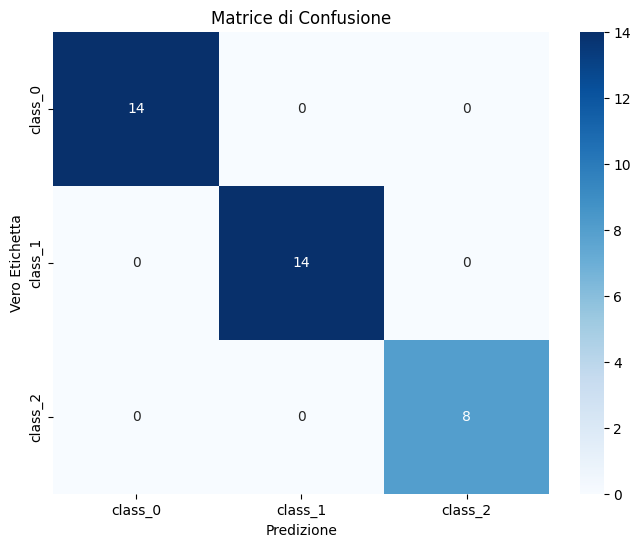

In [47]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=wine_data.target_names, yticklabels=wine_data.target_names)
plt.title('Matrice di Confusione')
plt.xlabel('Predizione')
plt.ylabel('Vero Etichetta')
plt.show()